hello


# C1_W2_Lab03_Feature_Scaling_and_Learning_Rate_Soln
## Goals
In this lab we will:
- Utilize  the multiple variables routines developed in the previous lab
- run Gradient Descent on a data set with multiple features
- explore the impact of the *learning rate alpha* on gradient descent
- improve performance of gradient descent by *feature scaling* using z-score normalization

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
# laod the data
def load_house_data():
    data = np.loadtxt("Data/houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y

X_train,y_train= load_house_data()

In [8]:
X_features = ['size(sqft)','bedrooms','floors','age']
df= pd.DataFrame(data=X_train,columns=X_features)
df['Price (in 1000 dollars)']= y_train

In [9]:
df.head()

,size(sqft),bedrooms,floors,age,Price (in 1000 dollars)
0,1244.0,3.0,1.0,64.0,300.0
1,1947.0,3.0,2.0,17.0,509.8
2,1725.0,3.0,2.0,42.0,394.0
3,1959.0,3.0,2.0,15.0,540.0
4,1314.0,2.0,1.0,14.0,415.0


Text(0, 0.5, 'Price (in 1000 $)')

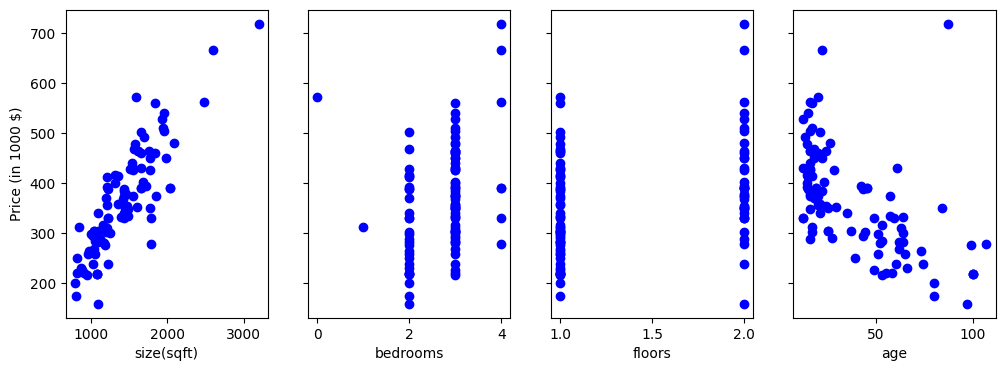

In [15]:
# how output looks like on the features:
fig, ax = plt.subplots(1,4, figsize= (12,4),sharey=True)
for i in range(len(X_features)):
    ax[i].scatter(X_train[:,i],y_train,c='b')
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("Price (in 1000 $)")